# Lab 2

Noah Kim
Section AC

In [613]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))
import numpy as np
import pandas as pd
from scipy import stats, signal

# Problem 1

Assuming in one day, I get 6 average cosmic-ray background and an average of 9 gamma-rays emitted in one day.

In [614]:
avg_cosmic_ray = 6
avg_gamma_ray = 9

 Under the assumption that the cosmic rays follow a poisson distribution, I can plot what the probability mass function looks like in one day.

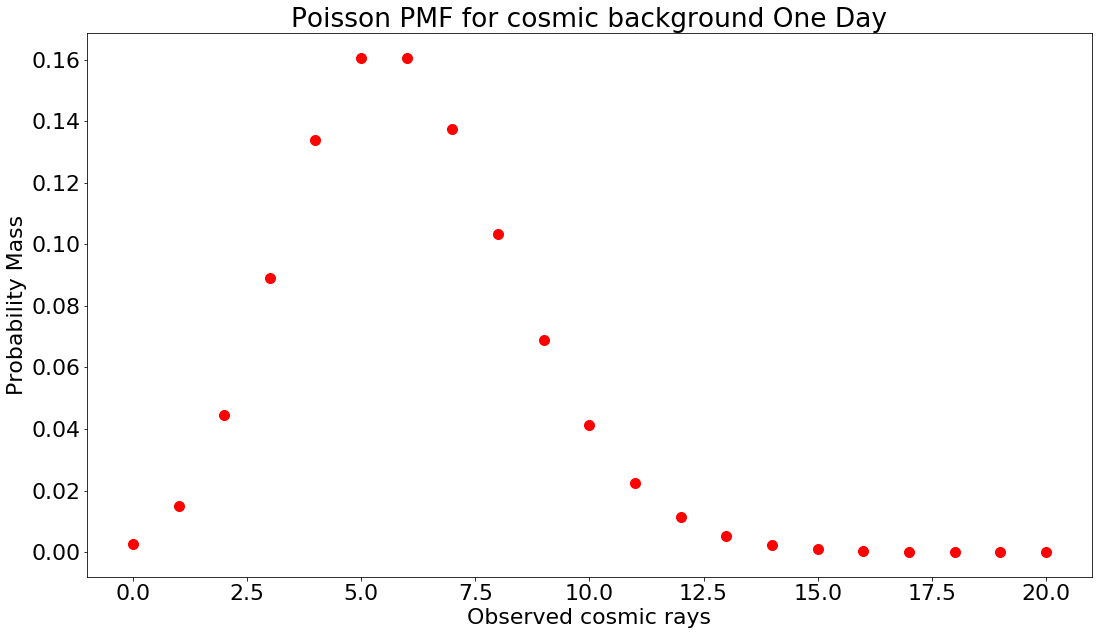

In [615]:
x = np.linspace(0,20 , num=21)
dist = stats.poisson(avg_cosmic_ray)
pmf = dist.pmf(x)
plt.plot(x,pmf,'r.', markersize='20');
plt.title("Poisson PMF for cosmic background One Day")
plt.xlabel("Observed cosmic rays")
plt.ylabel("Probability Mass");

To show how the distribution changes as we integrate over a period of several days, I will plot the corresponding expected number of cosmic rays seen after $n$ days. Using the SciPy convolve function. I will convolve the distribution with itself for the given number of additional days.

In [616]:
def sum_plot(pmf, n, color):
    new_pmf = pmf
    for i in range(n - 1):
        new_pmf = signal.convolve(new_pmf, pmf)
    plt.plot(np.linspace(0 * n, (20 * n), len(new_pmf)),new_pmf, color, markersize='10', label=f'Summed {n} days')
    plt.xlim(0, None)
    plt.legend()

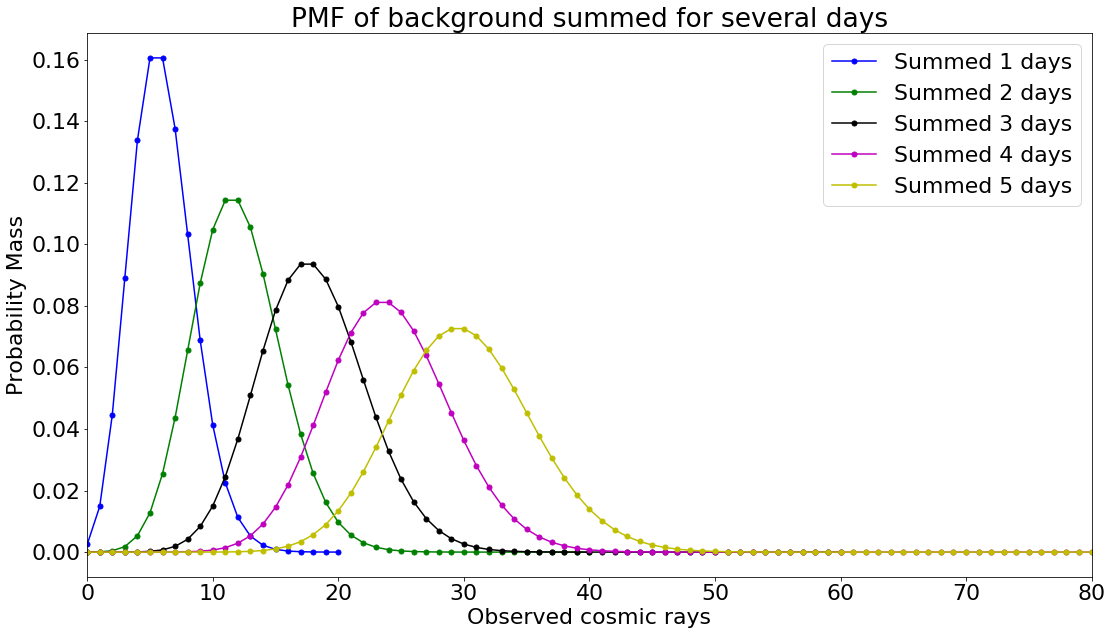

In [617]:
n = 5
sum_plot(pmf, 1, 'b.-')
sum_plot(pmf, 2, 'g.-')
sum_plot(pmf, 3, 'k.-')
sum_plot(pmf, 4, 'm.-')
sum_plot(pmf, 5, 'y.-')
plt.xlim([0, x[-1] * (n - 1)])
plt.title("PMF of background summed for several days");
plt.xlabel("Observed cosmic rays");
plt.ylabel("Probability Mass");


Above I plotted the probability mass function for the sum of 1, 2, 3, 4, and 5 days. As the days increase the probability mass function decreases and the cosmic ray mean shifts towards the right when adding more and more days. Switching the y scale into log:

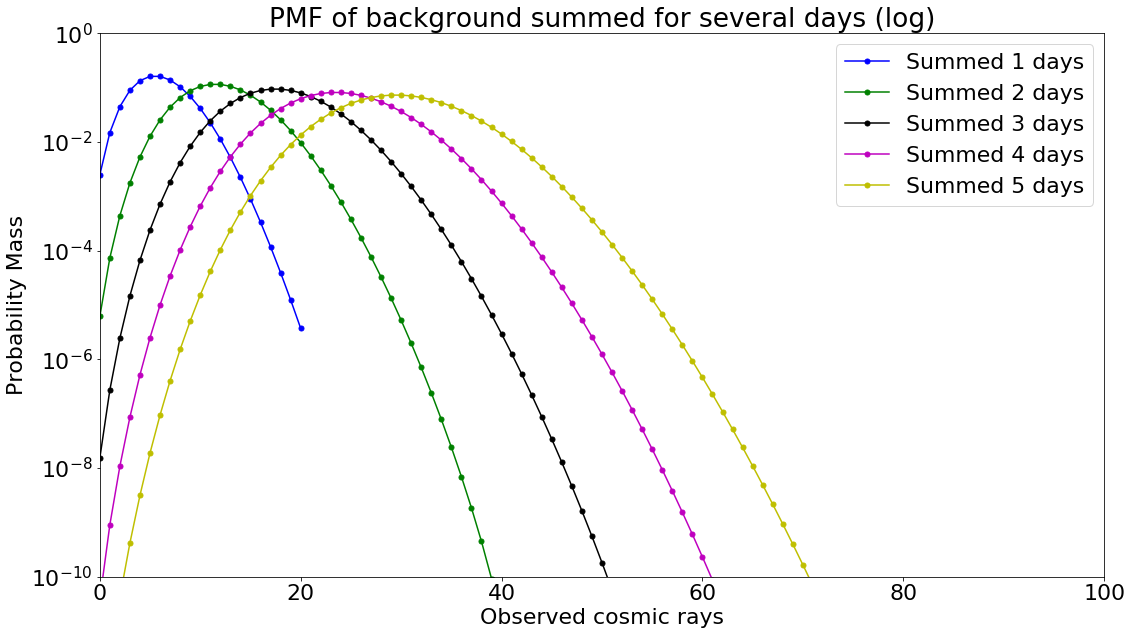

In [618]:
plt.yscale('log');
n = 5
sum_plot(pmf, 1, 'b.-');
sum_plot(pmf, 2, 'g.-');
sum_plot(pmf, 3, 'k.-');
sum_plot(pmf, 4, 'm.-');
sum_plot(pmf, 5, 'y.-');
plt.xlim(0, x[-1] * n)
plt.ylim(1e-10, 1);
plt.title("PMF of background summed for several days (log)");
plt.xlabel("Observed cosmic rays");
plt.ylabel("Probability Mass");

Integrating the PMF of the Poisson distribution of the sum of cosmic rays, the distribution still maintains the "tail" associated with a Poisson distribution. I can safely conclude that with the sum of 5 days of cosmic rays, the distribution remains poisson. Conceptually this makes sense because the poisson distribution describes the independent probability of discrete events occuring over a time interval. With the case of doing it over 5 days all we did was add 5 of these independent variables together resulting in the distribution to remain poisson.

Mathematically, this also makes sense because convolving multiple poisson distributions is just the poisson distribution with a mean equal to the sum of the average cosmic rays over a period of days. For example, one day will have the mean at 6, for two days the mean will fall at 12, three 18 and etc. 

In order to find the average number of cosmic rays per day I convolved the distribution with itself by $n$ times with $n$ being the amount of extra days. then divided the x-axis by $n$ days. 

In [619]:
def sum_avg(pmf, n, color):
    new_pmf = pmf
    for i in range(n - 1):
        new_pmf = signal.convolve(new_pmf, pmf)
    plt.plot(np.linspace(0, 20, len(new_pmf)),new_pmf, color, markersize='10', label=f'Summed {n} days')
    plt.xlim(0, None)
    plt.legend()

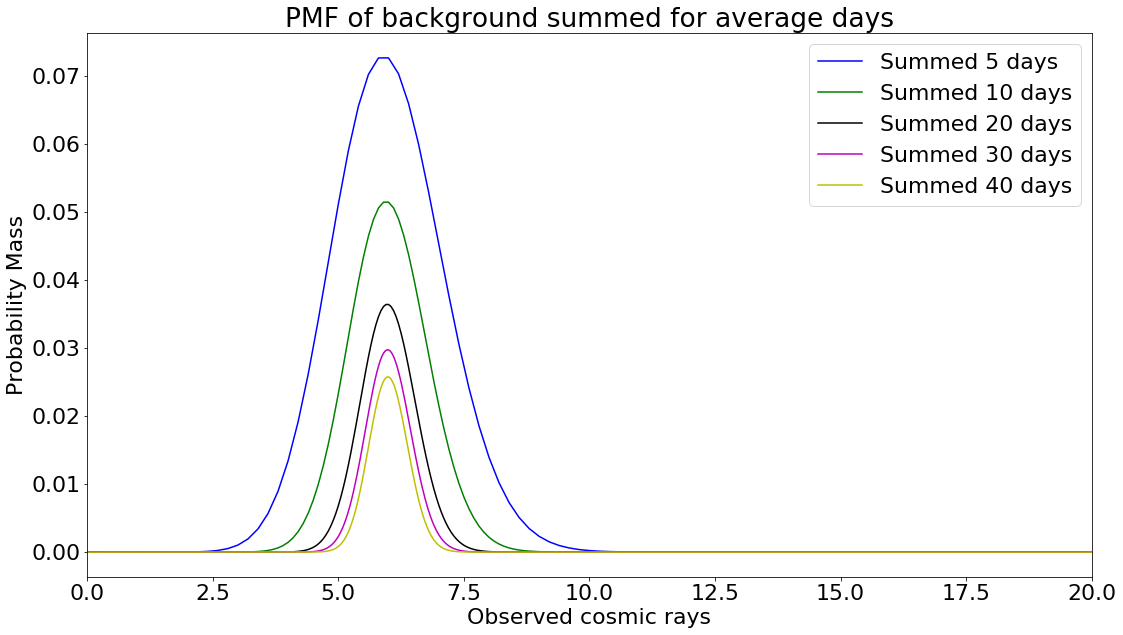

In [620]:
sum_avg(pmf, 5, 'b-')
sum_avg(pmf, 10, 'g-')
sum_avg(pmf, 20, 'k-')
sum_avg(pmf, 30, 'm-')
sum_avg(pmf, 40, 'y-')
plt.xlim([0, x[-1]])
plt.title("PMF of background summed for average days");
plt.xlabel("Observed cosmic rays");
plt.ylabel("Probability Mass");

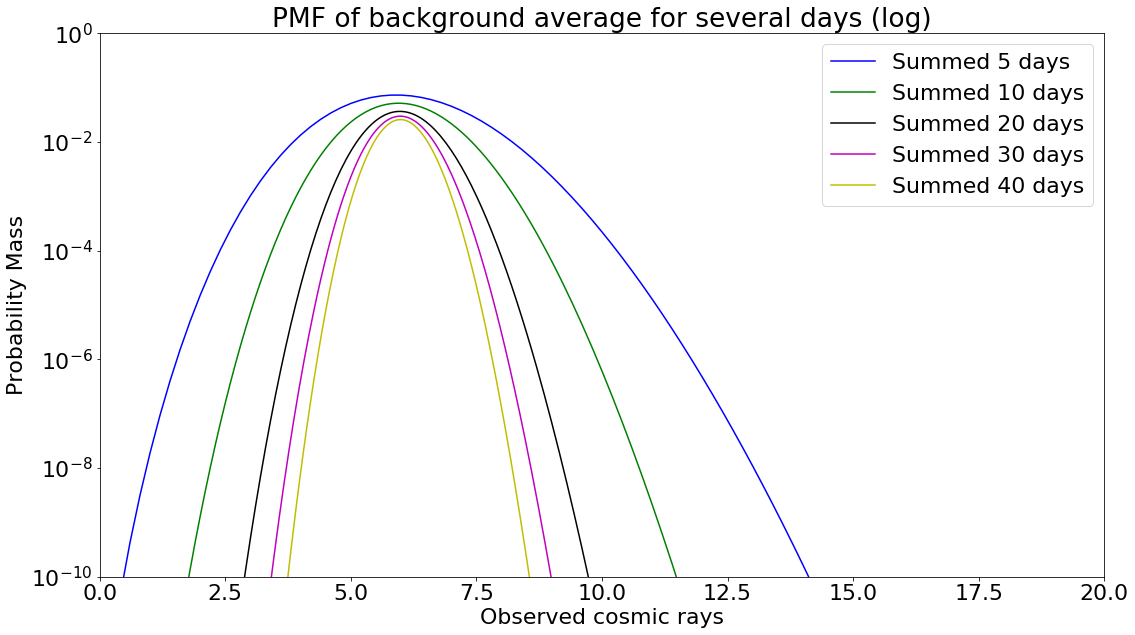

In [621]:
plt.yscale('log')
sum_avg(pmf, 5, 'b-')
sum_avg(pmf, 10, 'g-')
sum_avg(pmf, 20, 'k-')
sum_avg(pmf, 30, 'm-')
sum_avg(pmf, 40, 'y-')
plt.xlim([0, x[-1]])
plt.ylim(1e-10, 1);
plt.title("PMF of background average for several days (log)");
plt.xlabel("Observed cosmic rays");
plt.ylabel("Probability Mass");

As $n$ increases, the distribution shrinks and converges around the mean and looks more Gaussian. A characteristic of a Gaussian distribution is its downard parabolic shape (on a logarithmic scale) and as $n$ increases it loses its poisson tail. This makes sense because the more we average, the more possible values there are and so the probability masses are distributed accordingly.

The central limit theorem says that in certain situations, repeating convolutions of a distribution will eventually cause the distribution to converge to a Gaussian distribution and that is what is shown above. 

Say I waited 10 days and assumed I saw 90 gamma rays from my source (9 * 10). What would be the sigma of my observation?

In [574]:
# 6 * 10 n = 10 and amount of gamma mean is 9 * 10
probability = 1 - stats.poisson.cdf(90,60)
print('The probability that background could of produced 90 gamma rays or more: ', probability)
sigma = stats.norm.ppf(1-probability)
print('The sigma certainty observed :' ,sigma, 'σ')

The probability that background could of produced 90 gamma rays or more:  0.00011682864095963197
The sigma certainty observed : 3.6795375524897875 σ


# Problem 2

I chose the Rayleigh's distribution to describe the background signal over time under the assumption that $\sigma = 1$. 

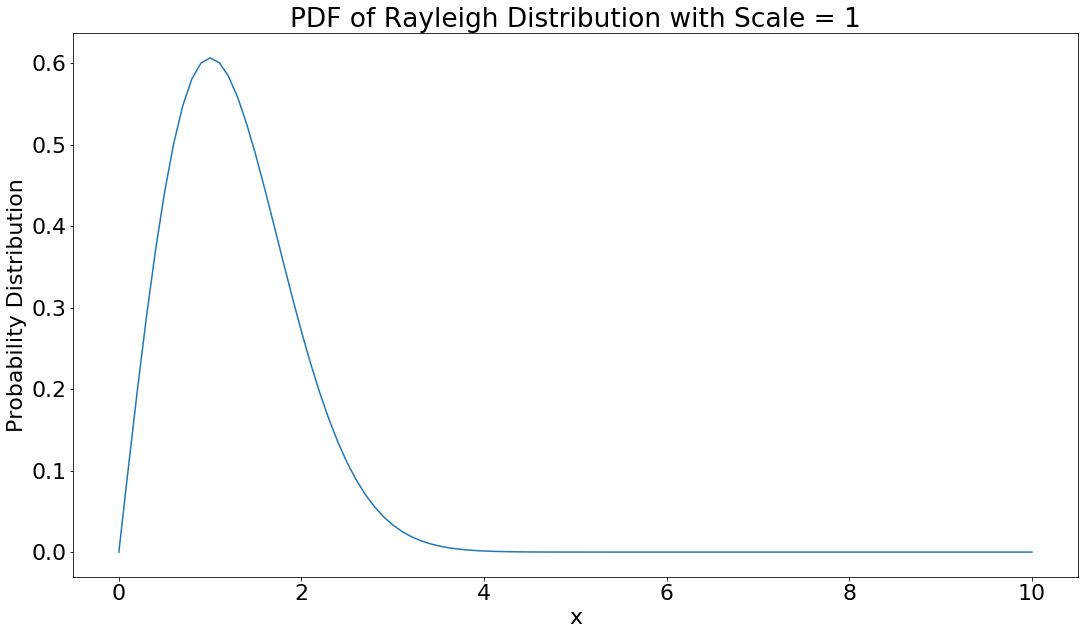

In [464]:
x = np.linspace(0,10,num=101)
pdf = stats.rayleigh.pdf(x,scale=1)
plt.plot(x,pdf)
plt.title("PDF of Rayleigh Distribution with Scale = 1")
plt.xlabel("x")
plt.ylabel("Probability Distribution")

def avg_ray(pdf, n, color):
    new_pdf = pdf
    for i in range(n - 1):
        new_pdf = signal.convolve(new_pdf, pdf)
    plt.plot(np.linspace(0,10, len(new_pdf)), new_pdf, color, label=f"Averaged for {n} intervals")
    plt.xlim(x[0], x[-1])
    plt.legend()

Now plotting the average by convolving the distribution over itself like in the cosmic rays problem.

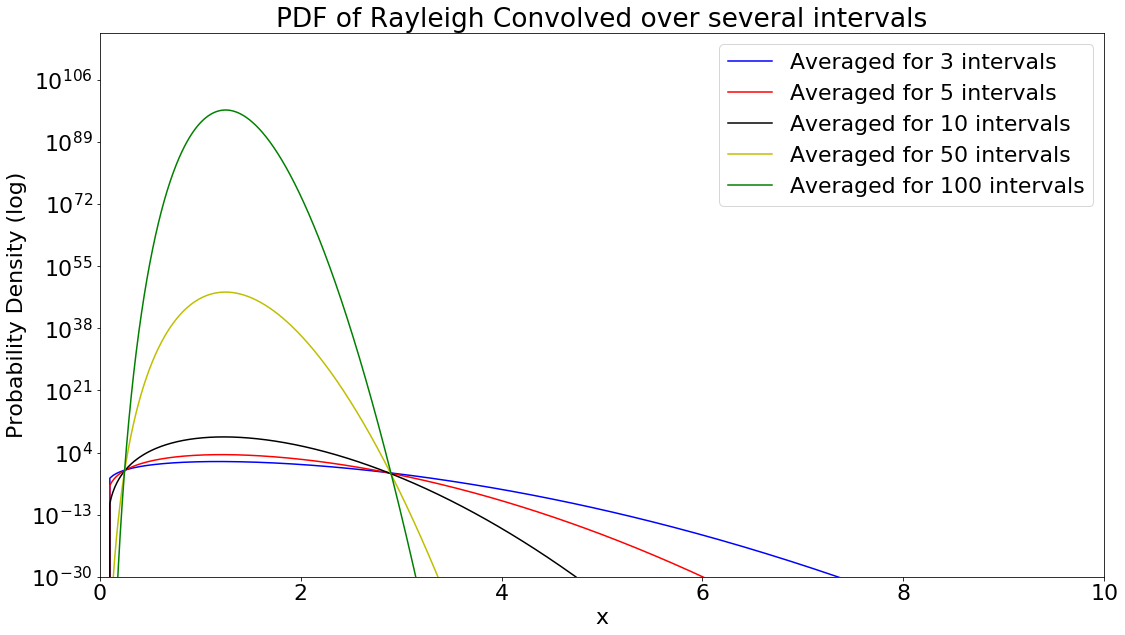

In [472]:
plt.yscale('log')
avg_ray(pdf, 3, 'b-')
avg_ray(pdf,5, 'r-')
avg_ray(pdf,10, 'k-')
avg_ray(pdf,50,'y')
avg_ray(pdf,100,'g')
plt.ylim(1e-30, None);
plt.title("PDF of Rayleigh Convolved over several intervals");
plt.xlabel("x");
plt.ylabel("Probability Density (log)");

As I continued to plot the average of the Rayleighs it becomes more and more Gaussian as $n$ increases. in my case the 100th interval makes the distribution look gaussian.

# problem 3
# Version 1

Say I am looking for a brightness reading of 14 and I have the width of a gaussian distribution at 1.5 and a mean of 5. Below is the Gaussian distribution for a brightness with a mean of 5 and a standard deviation of 1.5.

Text(0.5, 0, 'x')

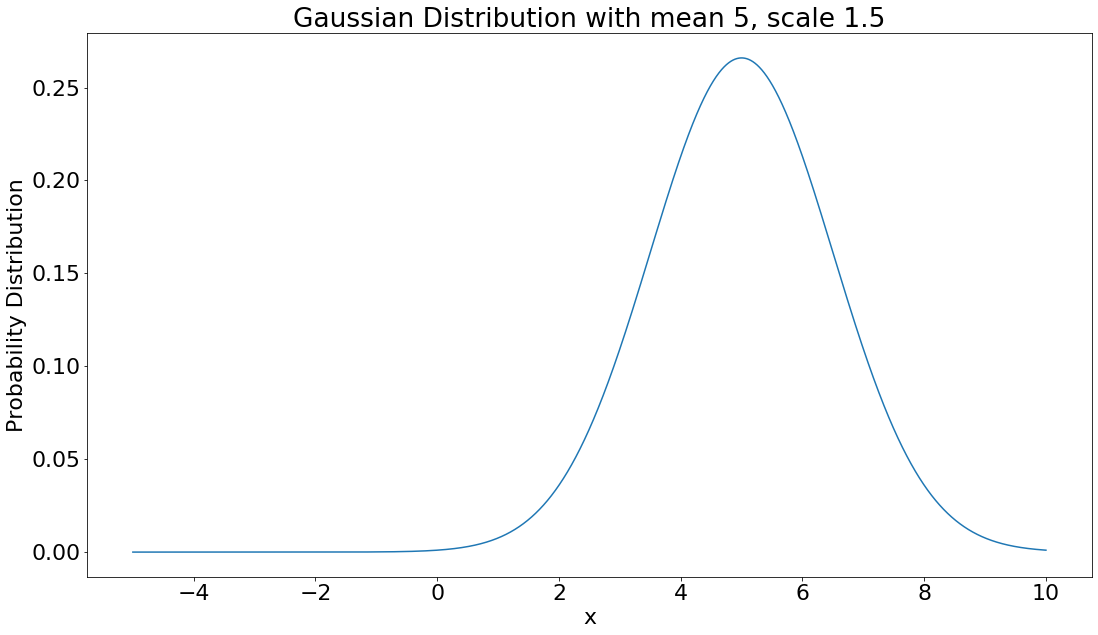

In [560]:
x = np.linspace(-5, 10, 10000)
prob_n = stats.norm.pdf(x,5, scale=1.5)
plt.plot(x, prob_n)
plt.title('Gaussian Distribution with mean 5, scale 1.5')
plt.ylabel('Probability Distribution')
plt.xlabel('x')

Then the significance of my detection would be:

In [561]:
prob = 1 - stats.norm.cdf(14,5 , 1.5)
sigma = stats.norm.ppf(1-prob)
print(prob)
print(sigma)

9.865877004244794e-10
5.9999999908841595


My $\sigma = 5.999$ traditionally in order to claim a discovery, $\sigma$ has to be greater than 5. In my case, I can claim a discovery.

# Version 2

Now what if the LIGO does not have an associated detection from SWIFT and I can only know what region in the sky to look rather than which pixel. 

As in version 1, I will do the same analysis but instead with 10000 pixels instead of one. In order to do this, I combined the background distribution of all 10000 pixels by multiplying 10000 to a single pixel. 

9.865877004244794e-06
4.267904750513104


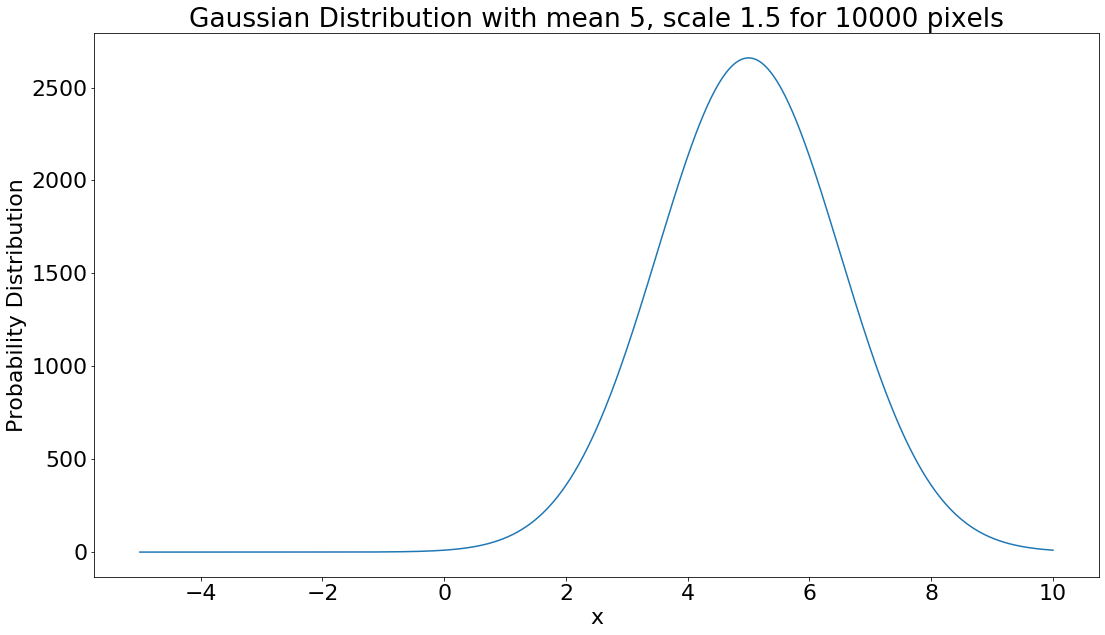

In [562]:
#for 10k
prob_n10 = prob_n * 10000
prob10 = prob * 10000
plt.plot(x, prob_n10)
plt.title('Gaussian Distribution with mean 5, scale 1.5 for 10000 pixels')
plt.ylabel('Probability Distribution')
plt.xlabel('x')

I more or less get the same probability distribution plot with one change, the probability distribution is 10000 times greater than that of the single pixel. Using the same brightness signal as before (b = 14) what is the significance of this measurement? The statistical question is different than the one I would ask for a single pixel, since I am using 10000 pixels instead of 1, my question would be: What is the probability of the _total_ signal-free background data of 10000 pixels producing a measurement that is signal-like or more than 14?

In order to put this mathematically, I would need to integrate the PDF of the total background distribution for 10000 pixels from 14 to $\infty$ but instead of $\frac {1}{\sqrt18\pi}$ in the equation for a gaussian distribution, we replace the 1 with 10000.

Calculating the significance for 10000 pixels:

In [563]:
sigma10 = stats.norm.ppf(1 - prob10)
print(prob10)
print(sigma10)

9.865877004244794e-06
4.267904750513104


My $\sigma = 4.2679$ traditionally in order to claim a discovery, $\sigma$ has to be greater than 5. With the number of trials performed and multiplying the probability of getting a false signal from the background by 10000, it changed the value of our significance so I can no longer claim a discovery like I could in version 1.

# Problem 4


The trials factor (sometimes known as a look-elsewhere effect) is an effect where if you search through a million locations, you would expect to see ~1 one in a million event. However, it is also over estimated how big an impact this makes on the sensitivity. In order to see the effect, I will be inverting the problem.

Working with version one, What is the signal required for a $5\sigma$ detection of one pixel? First, I need to find the corresponding probability of 5$\sigma$.

In [575]:
prob1 = 1 - stats.norm.cdf(5)
print(prob1)

and now to find the corresponding signal I want to find the point lets call $a$ where integrating $a to \infty$ gives us the probability associated with $\sigma = 5$ above. In order to do that I used the ppf function. Since ppf finds the point at which CDF matches the probability I used 1 - prob. Since I had a mean set at 5 and a scale set to 1.5. the signal is as follows:

In [576]:
signal1 = stats.norm.ppf(1 - b,5, 1.5)
print(signal1)

12.499999999955264


So in order to get a $5\sigma$ detection, I would need a signal of about 12.5

In order to find the signal threshold for a $5\sigma$ detection in our background for 10000 pixels I have to divide the probability by 10000 since we multiplied it by 10000 when I evaluated the integral in the previous problem. 

In [577]:
signal2 = stats.norm.ppf(1-prob1/10000, 5 , 1.5)
print(signal2)

14.825806230337482


In [578]:
print(signal2 / signal1)

1.1860644984312434


In order to get a $5\sigma$ detection, I would need a signal threshold of about 14.8. In comparison with one pixel, if we have 10000 pixels we need it to be around 19% more brighter to be able to claim a discovery. 

the reason it seems to be such a small factor is that the probability decays very quickly as it gets brighter (Gaussian tails decline very quickly). So if there really was a signal to be found, and it was only slightly brighter, the probability of getting the signal from the background is magnitudes lower.

The sensitivity penality due to a trials factor is low because in the case for a 10000 pixel vs 1 pixel, there is a 1 in 10000 chance which is 0.0001 so the sensitivity penalty is magnitudes lower.

If I were to increase the trials factor order of magnitude significantly by lets say a factor of 10 million. 

In [580]:
signal3 = stats.norm.ppf(1-b/10000000, 5, 1.5)
print(signal3)

16.271205709130818


In [581]:
print(signal3 / signal1)

1.3016964567351241


With a trials factor on the order of magnitude of 10 million, I would need a signal thats approximately 30% higher than a trial factor of 1 in order to claim a discovery. this is a one in 10,000,000 probability that the signal threshold barely changes because as we travel further from the mean the likelihood of seeing a signal drops drastically. The signal threshold logarithmically increases as the trials factor increases. In other words, signal threshold increases by a little per magnitude of trials factor.

# Extra Credit

With a non-Gaussian distribution, a Rayleigh distribution, the effect on our required signal threshold would be smaller as the trials factor increased. Because the probability density of the tail of the skewed distribution is larger relative to the height of a Gaussian tail, it would take a smaller increase in the signal threshold to match the same decrease in probability, since the area under the skewed distribution's tail is larger when the trials factor is larger.

consider the rayleigh distribution using the mean at 5 and a standard deviation of 1.5.

In [623]:
x = np.linspace(0,20,1000)
ray = stats.rayleigh.pdf(x,5, 1.5)
signal1 = stats.rayleigh.ppf(1 - b, 5, 1.5)
print(signal1)

13.233619664051357


In [624]:
signal2 = stats.rayleigh.ppf(1 - b/10000, 5, 1.5)
print(signal2)

15.451747253707175


In [625]:
print(signal2/signal1)

1.1676130677747434


The non-Gaussian distribution (Rayleigh in this case) has a threshold of 17% for 10000 pixels where in the Gaussian it was 19%. The Rayleigh distribution background has a smaller sensitivity penalty with a larger trials factor compared to a Gaussian distribution.